## Problem 1

In [1]:
import numpy as np 
import pandas as pd 
import random 
import matplotlib.pyplot as plt
random.seed(0) # please do not remove this line

In [2]:
data = np.genfromtxt('/content/drive/MyDrive/ColabNotebooks/AILearn/Assignment/Static/GAs_exercises_updated/GAs_exercises_updated/advertising.csv', 
                     dtype=None, 
                     delimiter=',', 
                     skip_header=1) 
features = data[:, :3]
prices = data[:, 3]

intercept = np.ones((features.shape[0], 1))
features = np.concatenate((intercept, features), axis=1)
TRAINSIZE = 0.8
TRAINSAMPLE = int(TRAINSIZE * data.shape[0])
X, y = features[:TRAINSAMPLE], prices[:TRAINSAMPLE]
print(X.shape, y.shape)
print(y)

(160, 4) (160,)
[22.1 10.4 12.  16.5 17.9  7.2 11.8 13.2  4.8 15.6 12.6 17.4  9.2 13.7
 19.  22.4 12.5 24.4 11.3 14.6 18.  17.5  5.6 20.5  9.7 17.  15.  20.9
 18.9 10.5 21.4 11.9 13.2 17.4 11.9 17.8 25.4 14.7 10.1 21.5 16.6 17.1
 20.7 17.9  8.5 16.1 10.6 23.2 19.8  9.7 16.4 10.7 22.6 21.2 20.2 23.7
  5.5 13.2 23.8 18.4  8.1 24.2 20.7 14.  16.  11.3 11.  13.4 18.9 22.3
 18.3 12.4  8.8 11.  17.   8.7  6.9 14.2  5.3 11.  11.8 17.3 11.3 13.6
 21.7 20.2 12.  16.  12.9 16.7 14.   7.3 19.4 22.2 11.5 16.9 16.7 20.5
 25.4 17.2 16.7 23.8 19.8 19.7 20.7 15.   7.2 12.   5.3 19.8 18.4 21.8
 17.1 20.9 14.6 12.6 12.2  9.4 15.9  6.6 15.5  7.  16.6 15.2 19.7 10.6
  6.6 11.9 24.7  9.7  1.6 17.7  5.7 19.6 10.8 11.6  9.5 20.8  9.6 20.7
 10.9 19.2 20.1 10.4 12.3 10.3 18.2 25.4 10.9 10.1 16.1 11.6 16.6 16.
 20.6  3.2 15.3 10.1  7.3 12.9]


In [3]:
n = 4
m = 600
n_generations = 100
losses = []
individuals = []


def generate_random_value(bound = 10):
  return (random.random() - 0.5)*bound
def compute_loss(individual):
  theta = np.array(individual)
  y_hat = X.dot(theta)
  loss = np.multiply((y_hat - y), (y_hat - y)).mean()
  return loss
def compute_fitness(individual):
  loss = compute_loss(individual)
  fitness = 1/(loss + 1)
  return fitness
def create_individual():
  return [generate_random_value() for _ in range(n)]
def crossover(individual1, individual2, crossover_rate = 0.9):
  individual1_new = individual1.copy()
  individual2_new = individual2.copy()
  for i in range(n):
    if random.random() < crossover_rate:
      individual1_new[i] = individual2[i]
      individual2_new[i] = individual1[i]

  return individual1_new, individual2_new
def mutate(individual, mutate_rate = 0.05):
  individual_new = individual.copy()
  for i in range(n):
    if random.random() < mutate_rate:
      individual_new[i] = generate_random_value()
  return individual_new
def selection(sorted_old_population):
  index1 = random.randint(0, m - 1)
  index2 = random.randint(0, m - 1)

  while index1 == index2:
    index2 = random.randint(0, m - 1)
  
  individual_new = sorted_old_population[index1]
  if index2 > index1:
    individual_new = sorted_old_population[index2]
  return individual_new

In [4]:
def create_new_population(old_population, elitism =  2, gen = 1):
    sorted_population = sorted(old_population, key=compute_fitness)
        
    if gen%1 == 0:
        losses.append(compute_loss(sorted_population[m-1]))
        print("Best loss:", compute_loss(sorted_population[m-1]), sorted_population[m-1])
    
    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication
        
        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)            
    
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind.copy())
    
    return new_population

In [5]:
population = [create_individual() for _ in range(m)]
for i in range(n_generations):
    population = create_new_population(population, 2, i)

Best loss: 483.90454471198655 [3.331600837968306, -0.09720038244186435, 1.449875562942834, -0.2732124726990648]
Best loss: 483.094904871828 [1.6512559671116978, -0.09720038244186435, 1.449875562942834, -0.2732124726990648]
Best loss: 277.06087685179835 [-1.7037000712217876, 0.10087959495908017, -0.8559360331635568, 0.46084882656170056]
Best loss: 243.1824342323276 [3.786588683257629, 0.03923197330006567, 1.0825424388534355, -0.5929906136471019]
Best loss: 243.1824342323276 [3.786588683257629, 0.03923197330006567, 1.0825424388534355, -0.5929906136471019]
Best loss: 243.1824342323276 [3.786588683257629, 0.03923197330006567, 1.0825424388534355, -0.5929906136471019]
Best loss: 76.70110423809695 [-2.002954409451385, 0.10087959495908017, 0.5592009467754167, -0.2886602743149336]
Best loss: 76.70110423809695 [-2.002954409451385, 0.10087959495908017, 0.5592009467754167, -0.2886602743149336]
Best loss: 76.70110423809695 [-2.002954409451385, 0.10087959495908017, 0.5592009467754167, -0.28866027431

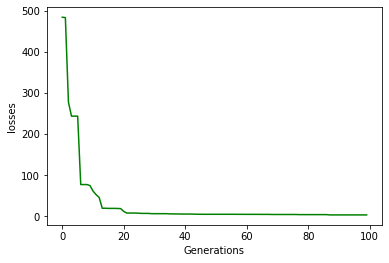

In [6]:
import matplotlib.pyplot as plt

plt.plot(losses[:200], c='green')
plt.xlabel('Generations')
plt.ylabel('losses')
plt.show()

[4.267284016504753, 0.054590716417594054, 0.0963206264086991, 0.01647767857528626]


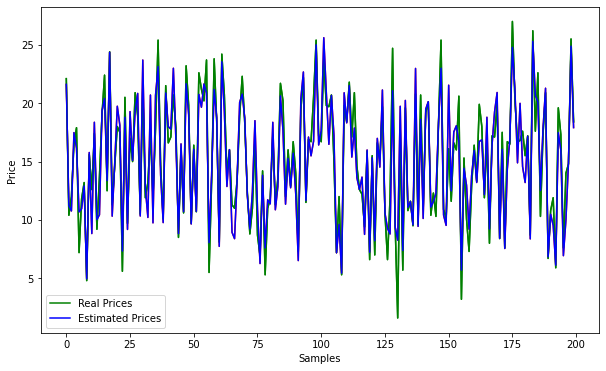

In [7]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
for feature in features:        
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
         
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(prices, c='green')    
plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.plot(prices, c='green', label='Real Prices')
plt.plot(estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()

## Problem 2

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line

iris = np.genfromtxt('/content/drive/MyDrive/ColabNotebooks/AILearn/Assignment/Static/GAs_exercises_updated/GAs_exercises_updated/iris_1D.csv', dtype=None, delimiter=',', skip_header=1) 
X_data = iris[:, :1]
y_data = iris[:, 1]

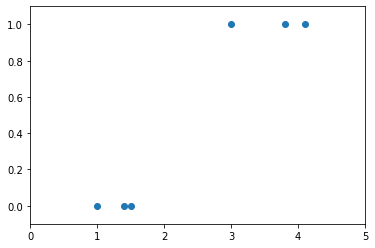

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim((-0.1, 1.1))
ax.set_xlim((0, 5))

plt.scatter(X_data[:,0], y_data)    
plt.show()

In [24]:
intercept = np.ones((X_data.shape[0], 1))
X_data = np.concatenate((intercept, X_data), axis=1)

print(X_data, X_data.shape)
print(y_data, y_data.shape)

[[1.  1.4]
 [1.  1. ]
 [1.  1.5]
 [1.  3. ]
 [1.  3.8]
 [1.  4.1]] (6, 2)
[0. 0. 0. 1. 1. 1.] (6,)


In [25]:
TRAINSIZE = 0.8
TRAINSAMPLE = int(TRAINSIZE * iris.shape[0])
X_train, y_train = X_data[:TRAINSAMPLE], y_data[:TRAINSAMPLE]

In [31]:
n_iris1D = 2
m_iris1D = 100
n_generations_iris1D = 100
losses_iris1D = []
thetas_iris1D = []

def sigmoid_function(z):
  return 1/(1+np.exp(-z))
def loss_function(y_hat, y):
  y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
  return (-y*np.log(y_hat) - (1-y)*np.log(1-y_hat)).mean()
def predict(X, theta):
  z = X.dot(theta)
  y_hat = sigmoid_function(z)
  return y_hat
def compute_loss_iris1D(individual):
  theta = np.array(individual)
  y_hat = predict(X_train, theta)
  loss = loss_function(y_hat, y_train)
  return loss
def compute_fitness_iris1D(individual):
  loss = compute_loss_iris1D(individual) 
  fitness = 1/(1+loss)
  return fitness
def create_individual_irirs1D():
  return [generate_random_value(bound = 20) for _ in range(n_iris1D)]
def crossover_iris1D(individual1, individual2, crossover_rate = 0.9):
  individual1_new = individual1.copy()
  individual2_new = individual2.copy()
  for i in range(n_iris1D):
    if random.random() < crossover_rate:
      individual1_new[i] = individual2[i]
      individual2_new[i] = individual1[i]

  return individual1_new, individual2_new
def mutate_iris1D(individual, mutate_rate = 0.05):
  individual_new = individual.copy()
  for i in range(n_iris1D):
    if random.random() < mutate_rate:
      individual_new[i] = generate_random_value(bound = 20)
  return individual_new
def selection_iris1D(sorted_old_population):
  index1 = random.randint(0, m_iris1D - 1)
  index2 = random.randint(0, m_iris1D - 1)

  while index1 == index2:
    index2 = random.randint(0, m_iris1D - 1)
  
  individual_new = sorted_old_population[index1]
  if index2 > index1:
    individual_new = sorted_old_population[index2]
  return individual_new

In [32]:
def create_new_population_iris1D(old_population, elitism =  2, gen = 1):
    sorted_population = sorted(old_population, key=compute_fitness_iris1D)
        
    if gen%1 == 0:
        # lưu lại để vẽ tối ưu
        losses_iris1D.append(compute_loss_iris1D(sorted_population[m_iris1D-1])) 
        print("Best loss:", compute_loss_iris1D(sorted_population[m_iris1D-1]), sorted_population[m_iris1D-1])
        
        # lưu lại để tính predict
        thetas_iris1D.append(sorted_population[m_iris1D-1])   
    
    # create new_population
    new_population = sorted_population[-elitism:] 
    
    while len(new_population) < m_iris1D:
        # selection
        individual_s1 = selection_iris1D(sorted_population)
        individual_s2 = selection_iris1D(sorted_population) # duplication
        
        # crossover
        individual_c1, individual_c2 = crossover_iris1D(individual_s1, individual_s2)
        
        # mutation
        individual_m1 = mutate_iris1D(individual_c1)
        individual_m2 = mutate_iris1D(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)
    
    return new_population

In [37]:
population_iris1D = [create_individual_irirs1D() for _ in range(n_generations_iris1D)]
for i in range(n_generations_iris1D):
    population_iris1D = create_new_population_iris1D(population_iris1D, 2, i)

Best loss: 0.09011173691067909 [-9.309985728133237, 5.2423050150602934]
Best loss: 0.08422803394309973 [-6.475844195595939, 3.0137676703236127]
Best loss: 0.08422803394309973 [-6.475844195595939, 3.0137676703236127]
Best loss: 0.08422803394309973 [-6.475844195595939, 3.0137676703236127]
Best loss: 0.05890885696141889 [-9.77250879777406, 5.2423050150602934]
Best loss: 0.026546506390668734 [-9.77250879777406, 4.481423510933786]
Best loss: 0.026546506390668734 [-9.77250879777406, 4.481423510933786]
Best loss: 0.026546506390668734 [-9.77250879777406, 4.481423510933786]
Best loss: 0.026546506390668734 [-9.77250879777406, 4.481423510933786]
Best loss: 0.026546506390668734 [-9.77250879777406, 4.481423510933786]
Best loss: 0.026053252291180516 [-9.77250879777406, 4.392913612496936]
Best loss: 0.026053252291180516 [-9.77250879777406, 4.392913612496936]
Best loss: 0.026053252291180516 [-9.77250879777406, 4.392913612496936]
Best loss: 0.026053252291180516 [-9.77250879777406, 4.392913612496936]
Be

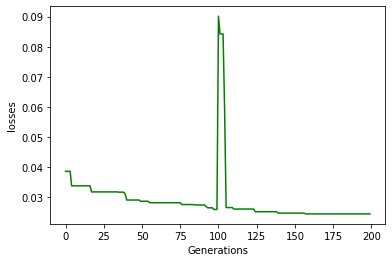

In [38]:
import matplotlib.pyplot as plt

plt.plot(losses_iris1D, c='green')
plt.xlabel('Generations')
plt.ylabel('losses')
plt.show()

[-9.95719579211957, 4.450048457351794]


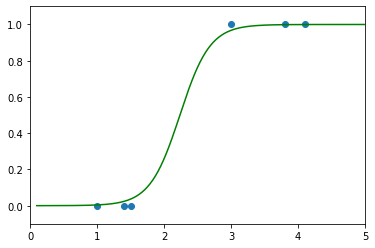

In [39]:
# Visualize predict & ground truth value

sorted_population = sorted(population_iris1D, key=compute_fitness_iris1D)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim((-0.1, 1.1))
ax.set_xlim((0, 5))

# plot data
plt.scatter(X_data[:,1], y_data)    

# sigmoid
x_values = np.arange(0.1, 5, 0.01)  # Tạo dữ liệu để test
x_values = x_values.reshape(x_values.shape[0], 1)
intercept = np.ones((x_values.shape[0], 1))
x_values  = np.concatenate((intercept, x_values), axis=1)
y_values  = predict(x_values, theta)
plt.plot(x_values[:, 1], y_values,c='green')

plt.show()